In [90]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [91]:
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure import AgentCollection, AgentNetwork
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution

In [92]:
uniform = Distribution(type="uniform", range=(0.05, 0.2))
linespace = Distribution(type="linespace", range=(-1,1))
belief_distribution = BeliefDistribution(uniform, linespace)
network = ArtificialNetwork(50, network_type="fully_connected")
update_rule = UpdateRule()
interactions = Interactions(update_rule, interaction_rate=0.7,information_source=(0.6, 0.4))
insights = Insights()
simulation = Simulation(1000, insights)

In [93]:
assimilation_biases = [1, 0.2, 0.01, 0]
def get_biases(update_rule, agent_group):
    interactions.update_rule = update_rule
    simulation_results = []
    for assimilation_bias in assimilation_biases:
        update_rule.assimilation_bias = assimilation_bias
        simulation.run(interactions, agent_group)
        result = copy.deepcopy(simulation.insights.belief_evolution)
        simulation_results.append(result)
    return simulation_results

In [94]:
agent_group = AgentNetwork(belief_distribution, network, VectorisedAgent)
update_rule = UpdateRule(filter_likelihood=True)
results_sobkowizc = get_biases(update_rule, agent_group)

Progress: 100%|██████████| 1000/1000 [00:03<00:00, 295.97it/s]


In [85]:
agent_group = AgentNetwork(belief_distribution, network, AnalyticalAgent)
update_rule = UpdateRule()
results_filter_prior = get_biases(update_rule, agent_group)

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 20565.15it/s]


In [86]:
agent_group = AgentNetwork(belief_distribution, network, AnalyticalAgent)
update_rule = UpdateRule(filter_likelihood=True)
results_filter_likelihood = get_biases(update_rule, agent_group)

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 20062.58it/s]


In [87]:
all_results = []
all_results.append(results_sobkowizc)
all_results.append(results_filter_prior)
all_results.append(results_filter_likelihood)

/var/folders/qj/5zmtfh2n12qb00h_8gwh8zhh0000gn/T/ipykernel_12815/1010158093.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


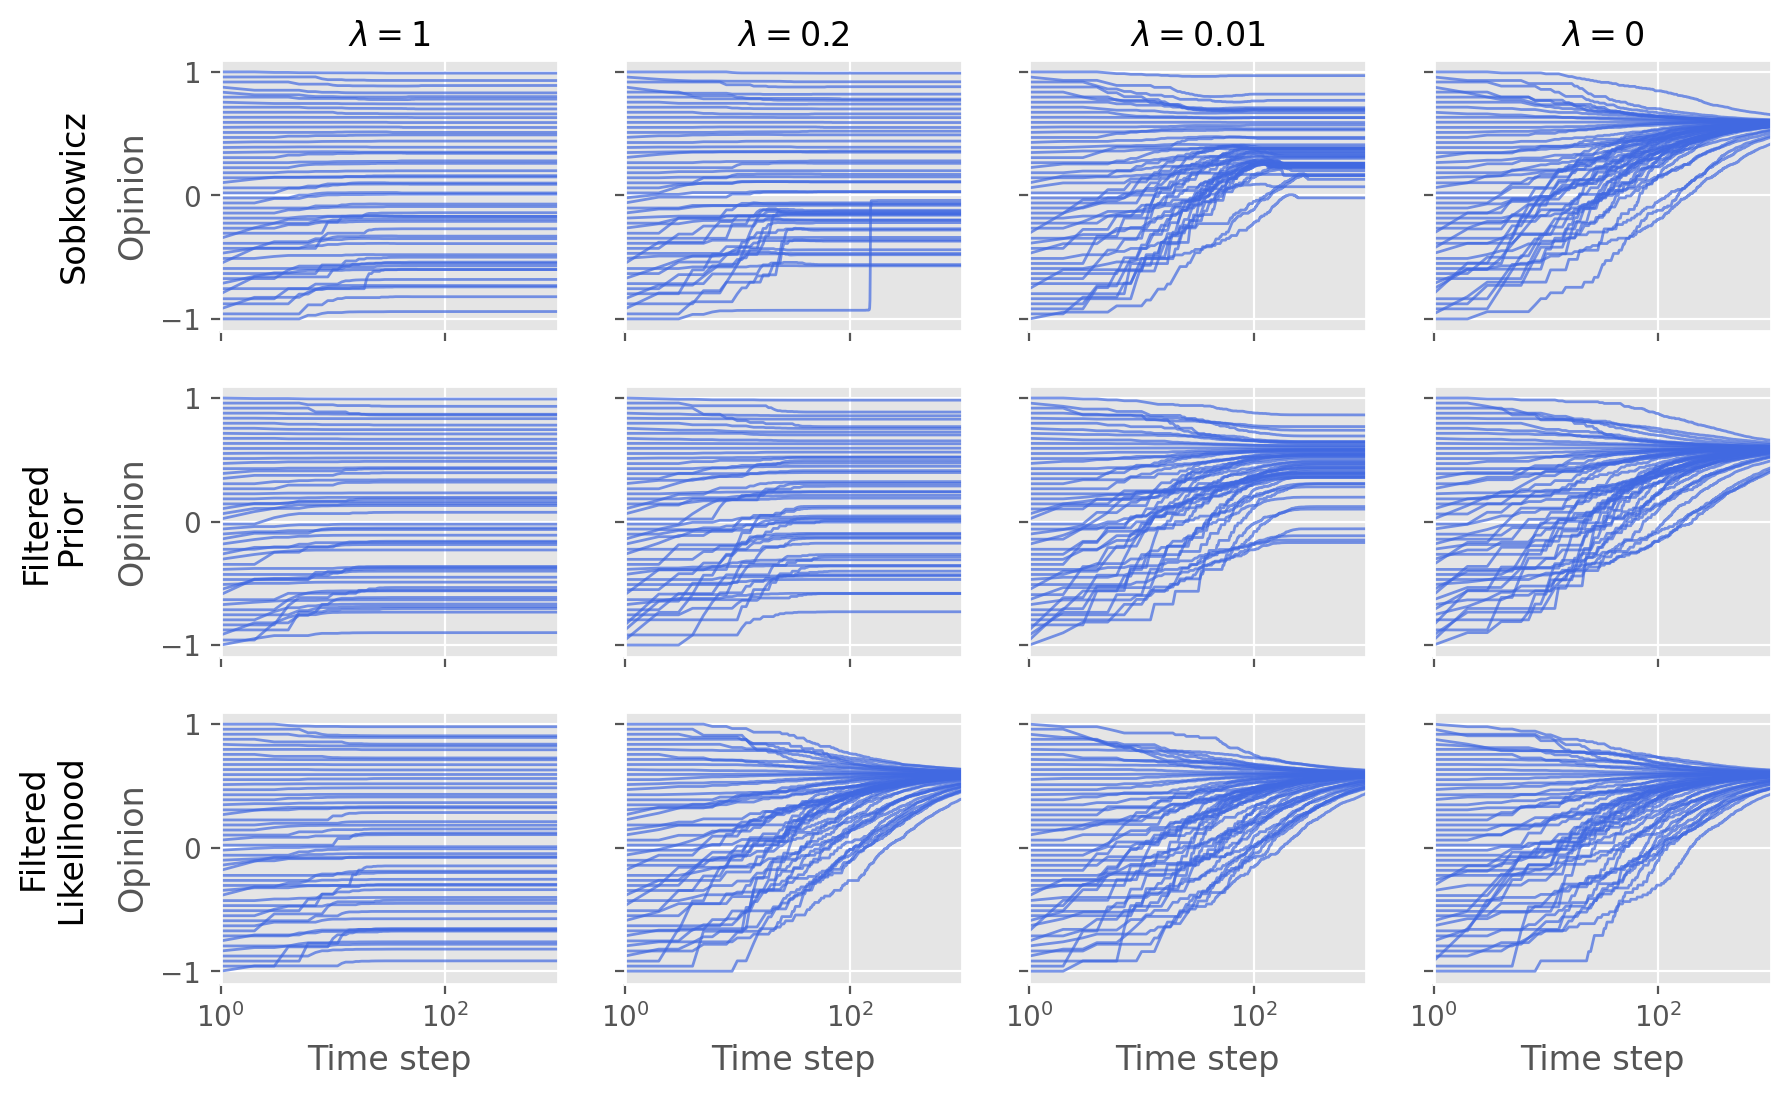

In [89]:
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 6))
cols = [r'$\lambda = {}$'.format(col) for col in assimilation_biases]
rows = ["Sobkowicz", "Filtered\n Prior   ", "Filtered \n Likelihood"]
for i in range(len(all_results)):
    for e in range(4):
        ax_plot_belief_evolution(all_results[i][e], axs[i,e])

pad = 5 

for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')
    
for ax, row in zip(axs[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation='vertical')

for ax in axs.flat:
    ax.set(xlabel='Time step', ylabel='Opinion')

for ax in axs.flat:
    ax.label_outer()

fig.show()
fig.savefig("../../results/plots/Methods/Behaviour/same_qualitative_behaviour.pdf", bbox_inches="tight")